# 3장
## 3.1 지도학습(Supervised Learning)
### 3.1.1 K-최근접 이웃
* 주어진 데이터에 대한 분류를 위해 사용
* 직관적이며 사용하기 쉬움
* 훈련 데이터를 충분히 확보할 수 있는 환경에서 사용하면 좋음

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# 데이터셋에 열(column) 이름 할당
dataset = pd.read_csv('./data/iris.data', names=names)
# pandas 데이터프레임에 저장

In [30]:
X = dataset.iloc[:, :-1].values # 제일 마지막 열을 제외한 값을 저장
y = dataset.iloc[:, 4].values # 다섯번째 열에 해당하는 값을 저장

print(X)
print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# 불러온 X와 y를 이용해 train, test dataset을 분리(test는 20%)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [31]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler() # 특성 스케일링(feature scaling), 평균이 0, 표준편차가 1이 되도록 변환

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)
# train, test dataset을 스케일링 진행

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) # k = 50인 k-nearest neighbors model 생성
knn.fit(X_train, y_train) # train

KNeighborsClassifier(n_neighbors=50)

In [33]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {: .6f}".format( accuracy_score(y_test, y_pred)))
# random하게 데이터를 자르기 떄문에 새로 데이터를 자르고 학습시킬 때마다 정확도가 달라짐.

정확도:  0.900000


In [41]:
# 이번에는 최적의 k 값을 찾는 코드
k=10
acc_array=np.zeros(k)
for k in np.arange(1,k+1,1): 
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train) # k값을 다르게 모델 생성
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1]=acc 

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("정확도 ", max_acc, "으로 최적의 k는", k+1, "입니다.") # 가장 정확도가 높은 결과 출력
# k 값에 따라 정확도가 많이 변하며 초기 설정이 매우 중요!!

정확도  0.9666666666666667 으로 최적의 k는 2 입니다.


### 3.1.2 서포트 벡터 머신(Support Vector Machine, SVM)
* 주어진 데이터에 대한 분류를 할 때 사용
* 정확도가 매우 좋으므로 정확도를 요구하는 분류 문제를 다룰 때 사용
* 텍스트를 분류할 때도 많이 사용
* SVM은 분류를 위한 기준선을 정의하는 모델
* 분류되지 않은 새로운 데이터를 받으면 결정 경계를 기준으로 경계의 어느 쪽에 속하는지 분류하는 모델

In [33]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# 'TF_CPP_MIN_LOG_LEVEL' 이라는 환경 변수를 사용해 로깅을 제어
# 초기값은 0으로 모든 로그가 표시, INFO 로그를 필터링 하려면 1, WARNING 로그를 필터링하려면 2
# ERROR 로그를 추가로 필터링 하려면 3으로 설정

In [34]:
iris = datasets.load_iris() # sklearn에서 제공하는 iris 데이터 호출
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, 
                                                                    iris.target, 
                                                                    test_size=0.6, 
                                                                   random_state=42)
# sklaern.model_selection을 사용해 train, test dataset 분리

In [35]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5) # linear 커널을 사용하는 svm 생성
# C는 오류를 얼마나 허용할 지에 대한 값(클수록 하드 마진)
# gamma는 결정 경계를 얼마나 유연하게 가져갈 지에 대한 값. 너무 크면 overfitting 일어남
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print('정확도: {0:f}'.format(score))

정확도: 0.988889


### 3.1.3 의사결정 트리
* 주어진 데이터에 대한 분류, 결과값을 예측할 때 사용
* 이상치가 많은 값으로 구성된 데이터셋을 다룰 때 사용
* 결정 과정이 시각적으로 표현되기 때문에 머신러닝이 어떤 방식으로 의사 결정을 하는지 알고 싶을 때 유용

In [5]:
import pandas as pd
df = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
print(df.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [6]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']] # 원하는 데이터들만 골라 추출
print(df)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}) # male은 0, female은 1로 변경
df = df.dropna() # Nan이 있는 행은 drop
print(df)

X = df.drop('Survived', axis=1) # 'Survived'를 예측 레이블로 사용하기 위해 해당 레이블을 제외하고 X에 저장
y = df['Survived'] # 정답 레이블로 사용하기 위해 y에 'Survived' 저장
print(X)
print(y)

             Pclass     Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                                                       
1                 3    male  22.0      1      0   7.2500         0
2                 1  female  38.0      1      0  71.2833         1
3                 3  female  26.0      0      0   7.9250         1
4                 1  female  35.0      1      0  53.1000         1
5                 3    male  35.0      0      0   8.0500         0
...             ...     ...   ...    ...    ...      ...       ...
887               2    male  27.0      0      0  13.0000         0
888               1  female  19.0      0      0  30.0000         1
889               3  female   NaN      1      2  23.4500         0
890               1    male  26.0      0      0  30.0000         1
891               3    male  32.0      0      0   7.7500         0

[891 rows x 7 columns]
             Pclass  Sex   Age  SibSp  Parch     Fare  Survived
PassengerId                              

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier() # model 생성

In [12]:
model.fit(X_train, y_train) # train

DecisionTreeClassifier()

In [17]:
y_predict = model.predict(X_test) # predict
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8268156424581006

In [20]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
) # confusion_matrix에 대한 결과

,Predicted Not Survival,Predicted Survival
True Not Survival,97,15
True Survival,16,51


### 3.1.4 로지스틱 회귀
* 회귀: 변수가 두 개 주어졌을 때 한 변수에서 다른 변수를 예측하거나 두 변수의 관계를 규명하는 데 사용한는 방법
    * 독립 변수(예측 변수): 영향을 미칠 것으로 예상되는 변수
    * 종속 변수(기준 변수): 영향을 받을 것으로 예상되는 변수


<span style = 'color:skyblue'>로지스틱 회귀</span>
* 데이터를 분류할 때 사용
* 주어진 데이터에 대한 확신이 없거나(예를 들어 분류 결과에 확신이 없을 때) 향후 추가적으로 훈련 데이터셋을 수집하여 모델을 훈련시킬 수 있는 환경에서 사용하면 유용
* 분석하고자 하는 대상들이 두 집단 혹은 그 이상의 집단으로 나누어진 경우, 개별 관측자들이 어느 집단으로 분류될 수 있는지 분석하고 이를 예측하는 모형을 개발하는 데 사용되는 기법

|구분|일반적인 회귀 분석| 로지스특 회귀 분석|
|---|----------------|-----------------|
|종속 변수|연속형 변수|이산형 변수|
|모형 탐색 방법|최소제곱법|최대우도법|
|모형 검정|F-테스트, t-테스트|X^2 테스트|

In [23]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print("Image Data Shape" , digits.data.shape) # digits dataset의 형태(총 1797장의 이미지, 8 x 8 크기)
print("Label Data Shape", digits.target.shape) # digit dataset의 레이블

Image Data Shape (1797, 64)
Label Data Shape (1797,)


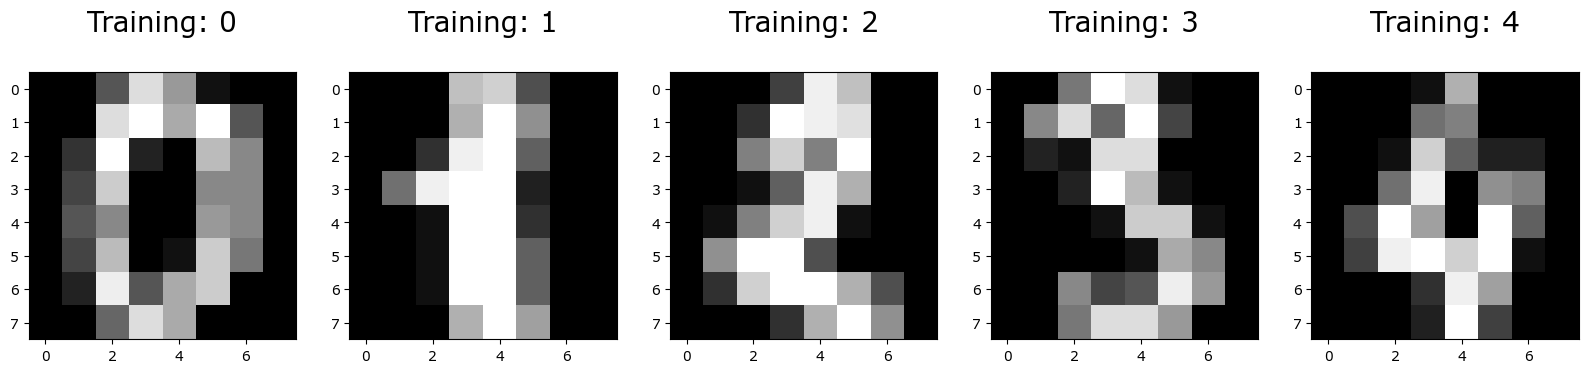

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])): # 이미지 5장 출력
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)
# train, test 분리
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스 생성
logisticRegr.fit(x_train, y_train) # train

C:\ProgramData\Miniconda3\envs\yolov5\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
logisticRegr.predict(x_test[0].reshape(1,-1)) # total predict
logisticRegr.predict(x_test[0:10]) # 처음 10개 결과 출력

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [30]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


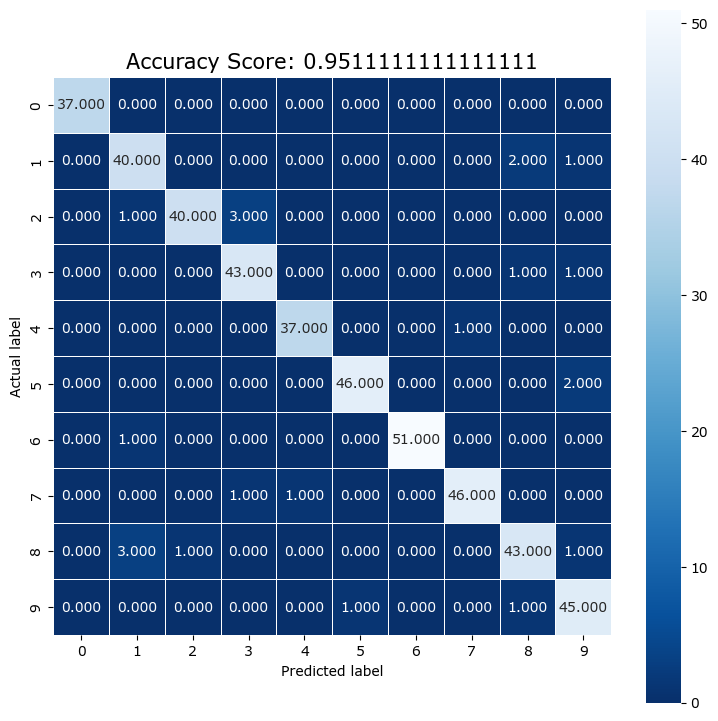

In [31]:
import numpy as np 
import seaborn as sns # confusion matrix을 표현하기 위해 seaborn 사용
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();
# 아래와 같이 표현하면 결과를 표현하기는 좋지만 직관적으로 이해하기에는 난해함
# confusion matrix는 결과 확인용만으로 사용하길 권장

### 3.1.4 선형 회귀
* 독립 변수 x를 사용하여 종속 변수 y의 움직임을 예측하고 설명하는데 사용
* 선형 회귀는 주어진 데이터에서 독립 변수(x)와 종속 변수(y)가 선형 관계를 가질 때 사용
* 복잡한 연산 과정이 없기 때문에 컴퓨팅 성능이 낮은 환경 혹은 메모리 성능이 좋지 않을 때 사용
* x와 y의 개수에 따라 단순 선형 회귀(simple linear regression), 다중 선형 회귀(multiple linear regression)

* 선형 회귀는 종속 변수와 독립 변수 사이의 관계를 설정하는데 사용, 변수 값을 추정 가능
* 로지스틱 회귀는 사건의 확률(0 또는 1)을 확인하는 데 사용
* 예를 들어 고객이 A 라는 제품을 구매할지 여부를 확인하는 경우 로지스틱 회귀 분석을 이용(종속 변수는 이진 변수로 표현되기 때문)

In [33]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [34]:
dataset = pd.read_csv('./data/weather.csv') # 날씨 dataset
# 강수량, 강설량, 기온, 풍속 및 뇌우 등 정보를 가지고 있지만 max temp, min temp만 사용할 예정

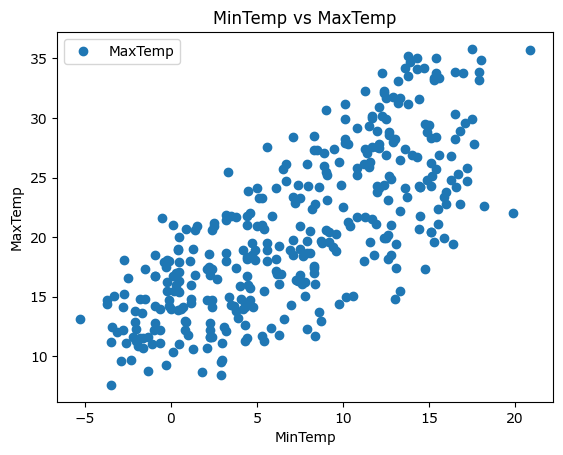

In [35]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  # max temp, min temp만 사용
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp') 
plt.show()

In [36]:
X = dataset['MinTemp'].values.reshape(-1,1) # min temp를 독립 변수 X로 지정
y = dataset['MaxTemp'].values.reshape(-1,1) # max temp를 종속 변수 y로 지정
# 즉 X 값에 따라 y의 값이 정해진다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# train, test dataset 분리
regressor = LinearRegression() # Linear Regression model
regressor.fit(X_train, y_train) #train

LinearRegression()

In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df # Actual은 실제 max temp, Predicted는 model이 예측한 max temp

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


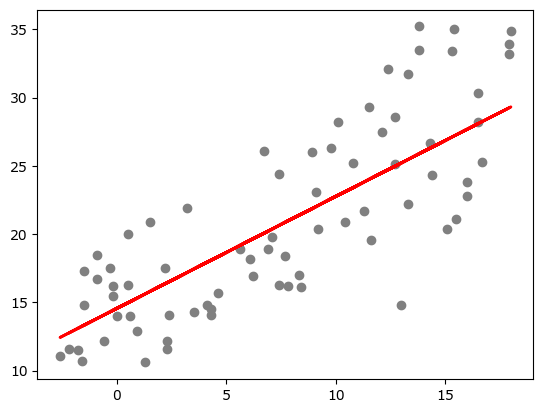

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show() # test 결과

In [39]:
print('평균제곱법:', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법: 17.01187766864062
루트 평균제곱법: 4.124545753006095


<span style = 'color:skyblue'>* 평균제곱법(MSE, Mean Square Error)</span><br>
<span style = 'color:skyblue'>* 루트 평균제곱법(RMSE, Root Mean Square Error)</span>

## 3.2 비지도학습(Unsupervision Learning)
* 레이블이 필요하지 않으며 정답이 없는 상태에서 훈련시키는 방식
* <span style = 'color:red'>군집</span>은 데이터의 유사성(거리)를 축정한 후 유사성이 높은(거리가 짧은) 데이터끼리 집단으로 분류
* <span style = 'color:red'>차원 축소</span>는 차원을 나타내는 특성을 줄여 데이터를 줄이는 방식

|구분|군집|차원 축소|
|----|----|---------|
|목표|데이터 그룹화|데이터 간소화|
|주요 알고리즘|K-평균 군집화(K-Means)|주성분 분석(PCA)|
|예시|사용자의 관심사에 따라 그룹화하여 마케팅에 활용|데이터 압축, 중요한 속성 도출|

### 3.2.1 K-평균 군집화(K-means clustering)
* 주어진 데이터에 대한 군집화를 위해 사용하며 주어진 데이터셋을 이용하여 몇 개의 클러스터를 구성할지 사전에 알 수 있을 때 사용하면 유용
* 적절한 K 값을 찾는 것이 중요
1. 중심점 선택: 랜덤하기 초기 중심점(centroid)을 선택한다.
2. 클러스터 할당: K개의 중심점과 각각의 개별 데이터 간의 거리(distance)를 측정한 후, 가장 가까운 중심점을 기준으로 데이터를 할당. 이 과정을 통해 클러스터가 구성
3. 새로운 중심정 선택: 클러스터마다 새로운 중심점을 계산
4. 범위 확인: 선택된 중심점에 더 이상 변화가 없다면 진행을 멈추고, 계속 변화가 있다면 2 ~ 3 과정을 반복


#### <span style = 'color:skyblue'>데이터가 비선형일 때, 군집 크기가 다를 때, 군집마다 밀집도(density)와 거리가 다를 때 사용하면 원하는 결과와 다르게 발생할 수 있으므로 사용하지 않는 것이 좋다.</span>


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('./data/sales data.csv') # 다양한 제품에 대한 연 지출 데이터
# Channel: 고객 채널(호텔/레스토랑/카페) 또는 소매 채널(명목형 데이터, 범주 간에 순서 의미가 없는 데이터)
# Region: 고객 지역(명목형 데이터, 범주 간에 순서 의미가 없는 데이터)
# Fresh: 신선한 제품에 대한 연간 지출(연속형 데이터)
# Milk: 유제품에 대한 연간 지출(연속형 데이터)
# Grocery: 식료품에 대한 연간 지출(연속형 데이터)
# Frozen: 냉동 제품에 대한 연간 지출(연속형 데이터)
# Detergent_Paper: 세제 및 종이 제품에 대한 연간 지출(연속형 데이터)
# Delicassen: 조제 식품에 대한 연간 지출(연속형 데이터)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [15]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col) # 명목형 데이터는 판다스의 get_dummies() 메서드를 
    # 사용해 숫자로 변환
    data = pd.concat([data, dummies], axis=1)
    print(data)
    data.drop(col, axis=1, inplace=True)
data.head()

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Channel_1  Channel_2  
0          1338          0          1  
1          1776          0          1  
2  

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [16]:
# 연속형 데이터의 모든 특성에 동일하게 중요성을 부여하기 위해 스케일링(scaling)을 적용
mms = MinMaxScaler()
print(data)
mms.fit(data)
data_transformed = mms.transform(data)
print(data_transformed)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Channel_1  \
0    12669   9656     7561     214              2674        1338          0   
1     7057   9810     9568    1762              3293        1776          0   
2     6353   8808     7684    2405              3516        7844          0   
3    13265   1196     4221    6404               507        1788          1   
4    22615   5410     7198    3915              1777        5185          0   
..     ...    ...      ...     ...               ...         ...        ...   
435  29703  12051    16027   13135               182        2204          1   
436  39228   1431      764    4510                93        2346          1   
437  14531  15488    30243     437             14841        1867          0   
438  10290   1981     2232    1038               168        2125          1   
439   2787   1698     2510      65               477          52          1   

     Channel_2  Region_1  Region_2  Region_3  
0   

C:\ProgramData\Miniconda3\envs\yolov5\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\yolov5\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\yolov5\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\yolov5\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarn

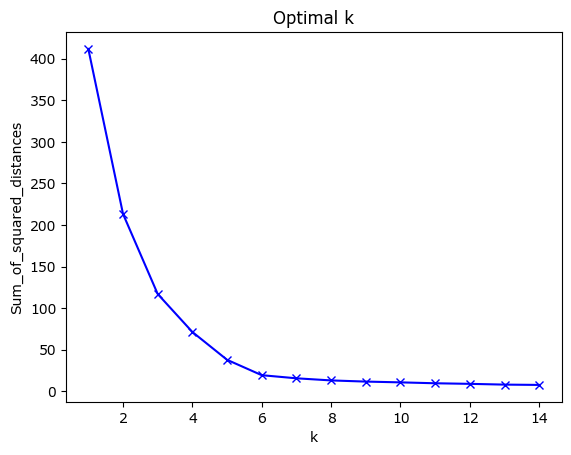

In [17]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K: # K에 1 부터 14까지 적용
    km = KMeans(n_clusters=k) # 1 ~ 14의 K 값 적용
    km = km.fit(data_transformed) # KMeans 모델 훈련
    Sum_of_squared_distances.append(km.inertia_) # km.inertia_는 계산 결과
    # SSM은 가장 가까운 클러스터 중심까지 거리를 제곱한 값의 합을 구할 때 사용

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

* K가 증가하면 거리 제곱의 합은 0이 되는 경향이 있고, K를 최댓값 n(여기에서 n은 샘플 수)으로 설정하면 각 샘플이 자체 클러스터를 형성하여 거리 제곱 합이 0과 같아지기 때문

### 3.2.2 밀도 기반 군집 분석(Density-Based Spatial Clustering of Applications with Noise, DBSCAN)
* 주어진 데이터에 대한 군집화를 위해 사용하며 K-mean clustering과 다르게 사전에 클러스터의 숫자를 알지 못할 때 사용하면 유용
* 주어진 데이터에 이상치가 많이 포함되었을 때 사용하면 유용
* noise에 영향을 받지 않으며, K-mean clustering에 비해 연산량은 많지만 오목하거나 볼록한 부분을 처리하는데 유용
1. 엡실론 내 점 개수 확인 및 중심점 결정: 원 안에 점 P1이 있을 때, 점 P1에서 거리 엡실론(epsilon) 내에 점이 m(minPts)개 있으면 하나의 군집으로 인식한다고 하자. 이때 엡실론 내에 점(데이터) m개를 가지고 있는 점 P1을 중심점(core point)라고 한다
2. 군집 확장: 1단계에서 새로운 군집을 생성했는데, 주어진 데이터를 사용하여 두 번째 군집을 생성. 데이터의 밀도 기반으로 군집을 생성하기 때문에 밀도가 높은 지역에서 중심점을 만족하는 데이터가 있다면 그 지역을 포함하여 새로운 군집을 생성
3. 1 ~ 2 단계 반복: 데이터가 밀집된 밀도가 높은 지역에서 더 이상 중심점을 정의할 수 없을 때까지 1 ~ 2 단계를 반복
4. 노이즈 정의: 어떤 군집에도 포함되지 않은 데이터를 노이즈로 정의

### 3.2.3 주성분 분석(PCA)
* 데이터의 간소화를 위해 사용하며 현재 데이터의 특성(변수)이 너무 많을 경우에는 데이터를 하나의 플롯(plot)에 시각화해서 살펴보는 것이 어렵다. 이때 특성 p개를 두세 개 정도로 압축해서 데이터를 시각화하여 살펴보고 싶을 때 유용한 알고리즘이다
* PCA는 고차원 데이터를 저차원(차원 축소) 데이터로 축소시키는 알고리즘!!
* 데이터들의 분포 특성을 잘 설명하는 벡터를 두 개 선택한 후 두 벡터를 위한 적절한 가중치를 찾을 때까지 학습을 진행
* 데이터 하나하나에 대한 성분을 분석하는 것이 아니라, 여러 데이터가 모여 하나의 분포를 이룰 때 이 분포의 주성분을 분석하는 방식

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [29]:
X = pd.read_csv('./data/credit card.csv') 
X = X.drop('CUST_ID', axis = 1) # 'CUST_ID' 열 삭제
X.fillna(method ='ffill', inplace = True)  # method = 'ffill' 이므로 Nan인 위치에 전 행의 값을 복사해 채움
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 평균 0, 표준편차 1이 되도록 데이터 크기 조정
X_normalized = normalize(X_scaled) # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # DataFrame 형태로 데이터 변경
print(X_normalized.head())

pca = PCA(n_components = 2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         0         1         2         3         4         5         6   \
0 -0.312038 -0.106331 -0.181129 -0.152156 -0.148808 -0.198985 -0.343796   
1  0.219928  0.037539 -0.131224 -0.099751 -0.127038  0.728177 -0.341439   
2  0.126684  0.146785 -0.030505  0.030851 -0.128792 -0.132251  0.359775   
3  0.020571 -0.426063  0.097223  0.228832 -0.190449 -0.154451 -0.424878   
4 -0.151630  0.218959 -0.195282 -0.146778 -0.192118 -0.197278 -0.428601   

         7         8         9         10        11        12        13  \
0 -0.289304 -0.301518 -0.287892 -0.202942 -0.217975 -0.409413 -0.225497   
1 -0.189662 -0.256269  0.160403  0.030762 -0.165387  0.192455  0.228782   
2  0.757449 -0.259805 -0.191342 -0.134881 -0.030888  0.234046 -0.108741   
3 -0.167299 -0.384185 -0.108474 -0.138062 -0.231084  0.346093 -0.250827   
4 -0.168765 -0.387551 -0.285424 -0.201202 -0.233109 -0.382671 -0.153993   

         14        15        16  
0 -0.130160 -0.224036  0.153753  
1  0.024353  0.065458  0.10079

In [24]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal) # create model and train
labels = db_default.labels_ # cluster label의 numpy array를 labels에 저장

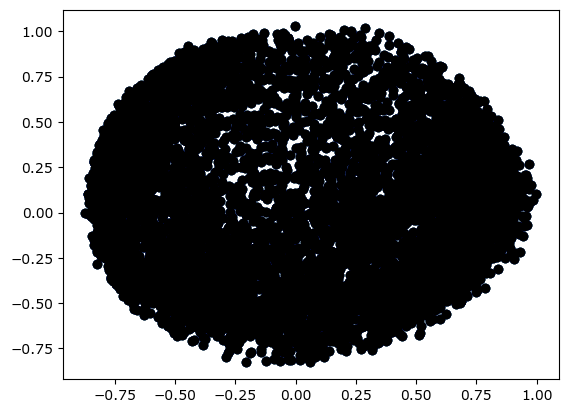

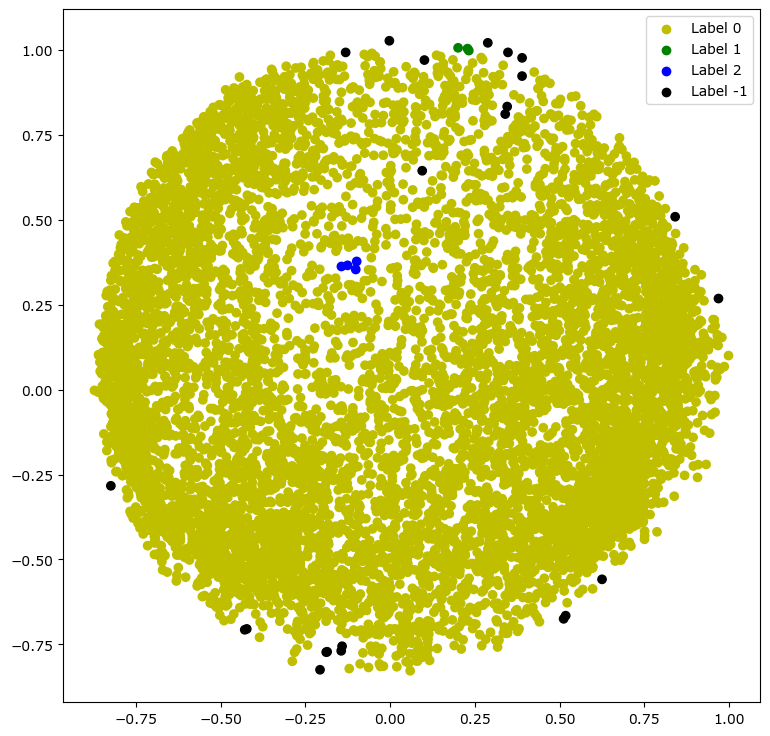

In [25]:
colours = {} 
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
cvec = [colours[label] for label in labels] # 각 데이터 포인트에 대한 색상 벡터 생성
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y'); 
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k'); 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) # 정의된 색상 벡터에 따라 X축에 P1,
# Y축에 P2
  
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

(8950,)


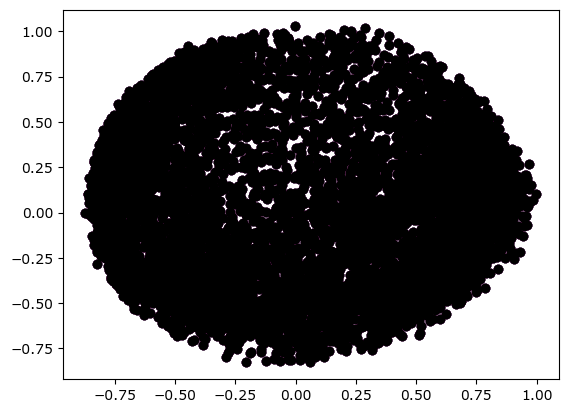

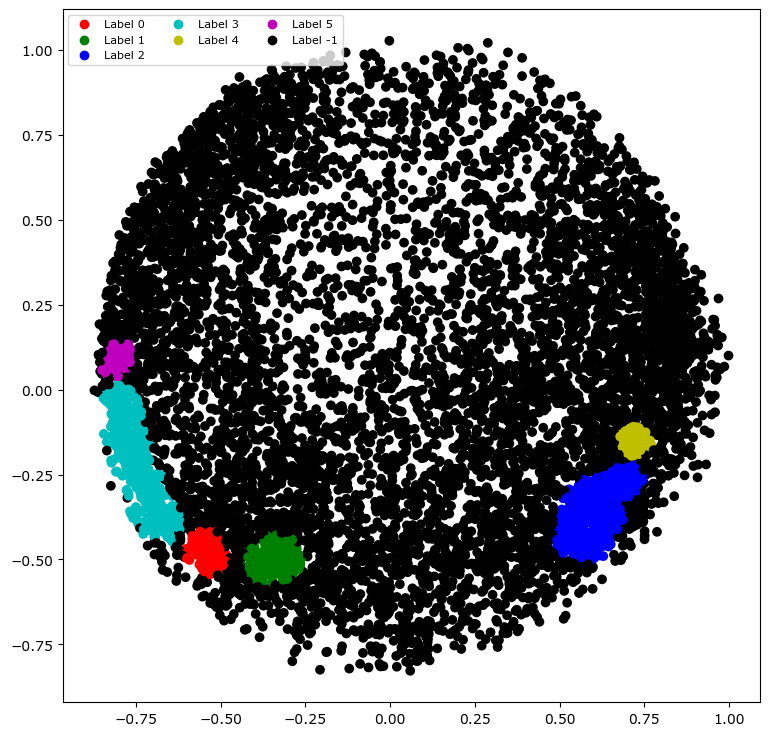

In [28]:
# 위 결과는 min_sample을 3으로 해서 좋지 않은 모습이다. 이번에는 50으로 변경해 진행
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


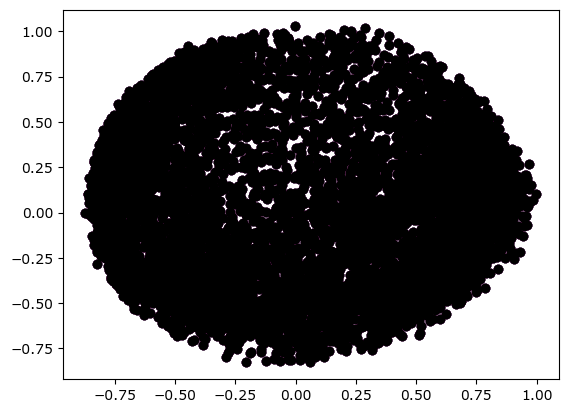

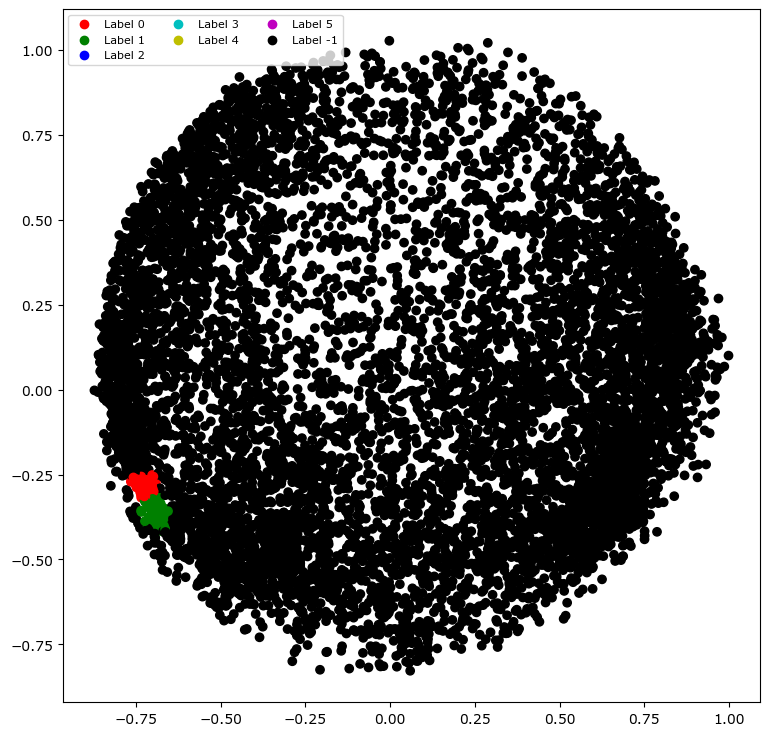

In [30]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter( 
    X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8) 
plt.show()


<span style = 'color:red'>모델에서 하이퍼파라미터 영향에 따라 클러스터 결과(성능)가 달라지므로, 최적의 성능을 내려면 하이퍼파라미터를 이용한 튜닝이 중요!!</span>